<a href="https://colab.research.google.com/github/EmmanuelUdeA/Modelos1-Pruebas-Saber-Pro/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!kaggle
!chmod 600 ./kaggle.json

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: the following arguments are required: command


In [ ]:
!kaggle competitions download -c udea-ai4eng-20241

udea-ai4eng-20241.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip udea-ai4eng-20241.zip

Archive:  udea-ai4eng-20241.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submission_example.csv  
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv("train.csv")
train

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,No,N,Si,Si,No,Primaria completa,bajo


In [ ]:
submission_example = pd.read_csv('submission_example.csv')
submission_example

In [ ]:
# Me tomare la libertad de eliminar una columna que esta repetida.
train = train.drop ('FAMI_TIENEINTERNET.1', axis = 1)

In [ ]:
train.info()

In [ ]:
train.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL'],
      dtype='object')

In [ ]:
# Vamos a preprocesar los datos

In [ ]:
train.shape

(692500, 16)

In [ ]:
# datos faltantes
k = train.isna().sum()

# Cuantos datos faltantes en cada columna
faltantes = k[k!=0]

print(faltantes)


ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_EDUCACIONMADRE               23664
dtype: int64


In [ ]:
for c in train.columns:
    print ("%20s"%c, train[c].dtype)

                  ID int64
             PERIODO int64
 ESTU_PRGM_ACADEMICO object
ESTU_PRGM_DEPARTAMENTO object
ESTU_VALORMATRICULAUNIVERSIDAD object
ESTU_HORASSEMANATRABAJA object
FAMI_ESTRATOVIVIENDA object
  FAMI_TIENEINTERNET object
 FAMI_EDUCACIONPADRE object
  FAMI_TIENELAVADORA object
 FAMI_TIENEAUTOMOVIL object
ESTU_PRIVADO_LIBERTAD object
ESTU_PAGOMATRICULAPROPIO object
FAMI_TIENECOMPUTADOR object
 FAMI_EDUCACIONMADRE object
  RENDIMIENTO_GLOBAL object


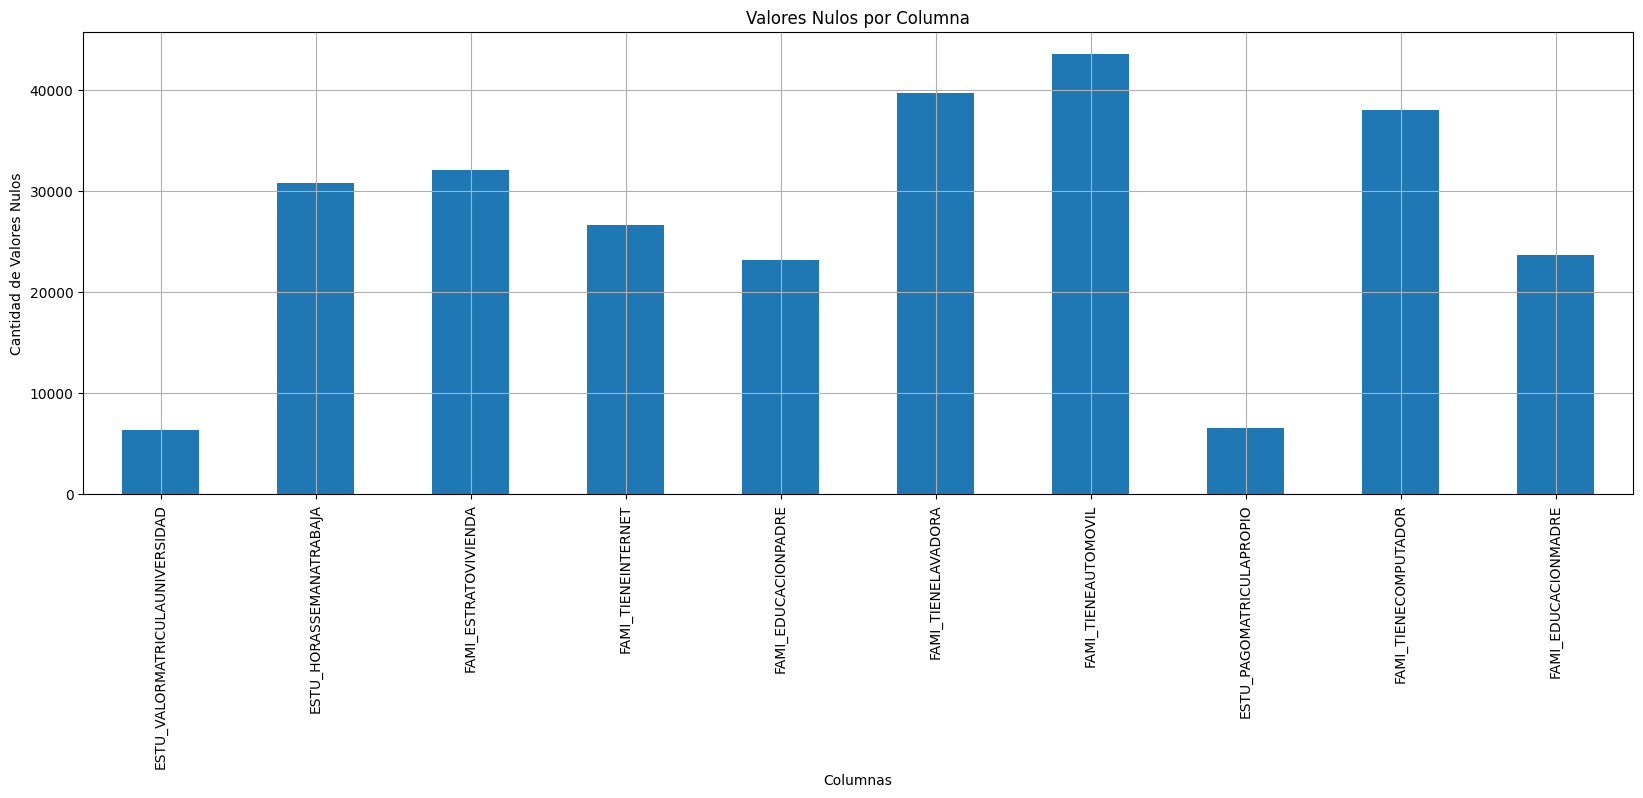

In [ ]:
# Para visualizar los datos faltantes
plt.figure(figsize=(20, 6))
faltantes.plot(kind='bar')
plt.title("Valores Nulos por Columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de Valores Nulos")
plt.grid()
plt.show()

Vemos la cantidad de datos faltantes que tenemos por columna, la columna que más datos faltantes presenta es FAMI_TIENEAUTOMOVIL nos podriamos ver tentados a eliminar esta columna, pero la cantidad de datos faltantes no es significativa con la cantidad de datos que tenemos por columna que son **692500** y los datos faltantes son **43623** por lo tanto esto representa aproximadamente el **16**% de nuestros datos, entonces no seria buena practica eliminar esta columna, más bien veamos cómo podemos organizar los datos faltantes de todas las columnas.

In [ ]:
train._get_numeric_data().describe().T

In [ ]:
ccols = [i for i in train.columns if not i in train._get_numeric_data()]
print (ccols)

In [ ]:
for c in ccols:
    print ("%10s"%c, np.unique(train[c].dropna()))

In [ ]:
c="ESTU_PRGM_ACADEMICO"
train[c].value_counts()

Empecemos por algo fundamental y es hacer la tarea de clasificación para nuestra variable a predecir, en este caso mapearemos 'RENDIMIENTO_GLOBAL' para que sus valores sean numericos y así poder tomar decisiones con respecto a la data restante

In [ ]:
# Diccionario de mapeo para RENDIMIENTO_GLOBAL
mapeo_rendimiento = {'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3}

# Aplicar mapeo a las columnas respectivas
train['RENDIMIENTO_GLOBAL'] = train['RENDIMIENTO_GLOBAL'].map(mapeo_rendimiento)

# Verificar los cambios
print(train[['RENDIMIENTO_GLOBAL']].head())

   RENDIMIENTO_GLOBAL
0                   2
1                   0
2                   0
3                   3
4                   1


Seguimos por algo sencillo, vamos a transformar las variables que solo tienen valores binarios, es decir **'Si'** & **'No'** por los numeros **1 = 'Si'** y **0 = 'No'**

Las columnas que nos permiten hacer esto son las siguientes:
'FAMI_TIENEINTERNET' , 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR'

In [ ]:
mapeo = {'Si': 1, 'S': 1, 'No': 0, 'N':0}

In [ ]:
target_columns = ['FAMI_TIENEINTERNET' , 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR']

In [ ]:
for column in target_columns:
    train[column] = train[column].map(mapeo)

In [ ]:
# Calcula el recuento de valores faltantes en las columnas específicas
valores_faltantes = train[target_columns].isnull().sum()

# Muestra los valores faltantes
print(valores_faltantes)


FAMI_TIENEINTERNET          26629
FAMI_TIENELAVADORA          39773
FAMI_TIENEAUTOMOVIL         43623
ESTU_PRIVADO_LIBERTAD           0
ESTU_PAGOMATRICULAPROPIO     6498
FAMI_TIENECOMPUTADOR        38103
dtype: int64


Veamos cómo están correlacionadas las variables que seleccionamos con respecto a la variable que deseamos predecir y así poder tomar decisiones.


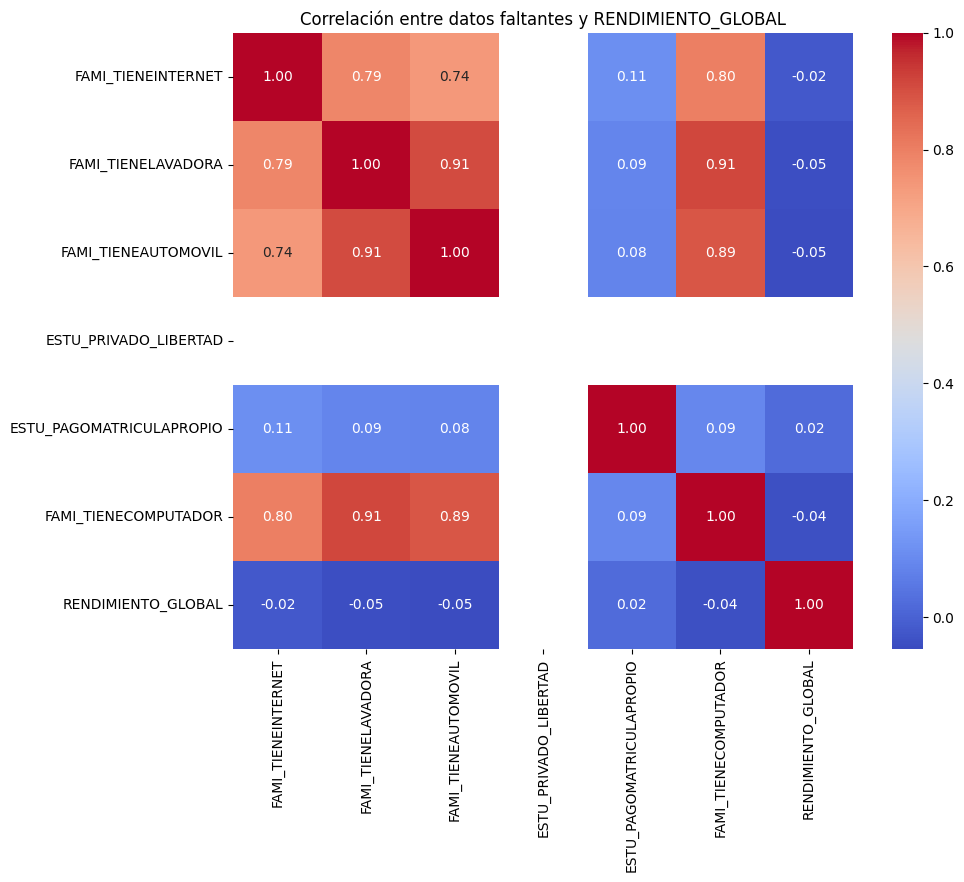

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcula el recuento de valores faltantes en las columnas específicas
valores_faltantes = train[target_columns].isnull().sum()

# Crea variables binarias de datos faltantes
missing_data_binary = train[target_columns].isnull().astype(int)

# Concatena las variables binarias con la variable objetivo
data_with_missing = pd.concat([missing_data_binary, train['RENDIMIENTO_GLOBAL']], axis=1)

# Calcula la correlación entre las variables binarias y la variable objetivo
correlation_matrix = data_with_missing.corr()

# Visualiza la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre datos faltantes y RENDIMIENTO_GLOBAL')
plt.show()


Cómo podemos observar hay un alta correlación entre los datos faltantes y las variables **[FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR']**
<br>
 por lo tanto nos centraremos en estas variables, y le daremos una solución que pienso es optima, puesto que las variables estan tan altamente correlacionadas, sería un error simplemente asignarle un valor deliberadamente a los datos faltantes, así que opte por ingresar de forma aleatoria y en proporciones iguales, datos que valgan '1' y '0' esto con la intención de que no se vea afectada nuestra correlacion final con la variable a predecir, aunque realmente no será muy significativo puesto que los datos faltantes tampoco son significativos con respecto a los datos que sí tenemos. Aun así creo que es una buena alternativa de abordar los valores faltantes


In [ ]:
# Definir las columnas de interés
columnas_de_interes = ['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR']


datos_imputados = train

# Iterar sobre las columnas de interés
for columna in columnas_de_interes:
    # Calcular la proporción de valores existentes
    proporciones = datos_imputados[columna].value_counts(normalize=True)

    # Calcular la proporción de 1 y 0
    prop_1 = proporciones.get(1, 0)
    prop_0 = proporciones.get(0, 0)

    # Imputar los valores faltantes de forma aleatoria
    datos_imputados[columna].fillna(np.random.choice([0, 1], p=[prop_0, prop_1]), inplace=True)

# Verificar si hay datos nulos en las columnas de interés después de la imputación
print("Datos nulos después de la imputación:")
print(datos_imputados[columnas_de_interes].isnull().sum())

Datos nulos después de la imputación:
FAMI_TIENEINTERNET      0
FAMI_TIENELAVADORA      0
FAMI_TIENEAUTOMOVIL     0
FAMI_TIENECOMPUTADOR    0
dtype: int64


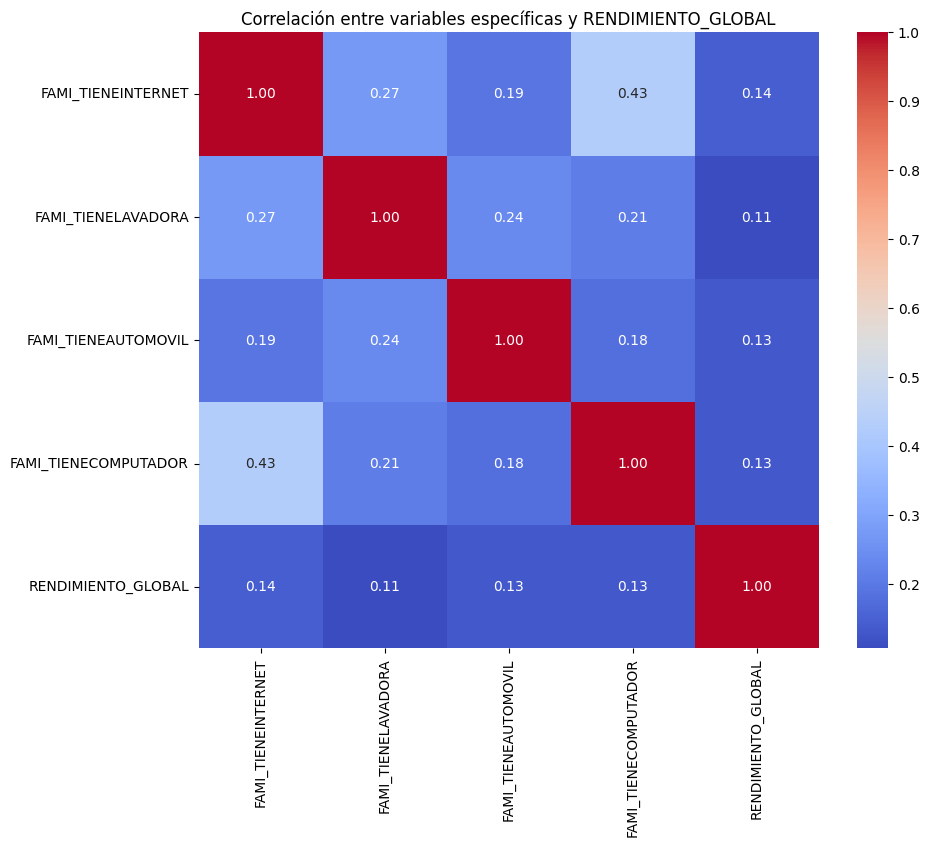

In [ ]:
# Seleccionar las columnas de interés incluyendo la variable objetivo
columns_of_interest = ['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'RENDIMIENTO_GLOBAL']

# Calcular la matriz de correlación solo para estas columnas
correlation_matrix_specific = datos_imputados[columns_of_interest].corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_specific, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables específicas y RENDIMIENTO_GLOBAL')
plt.show()

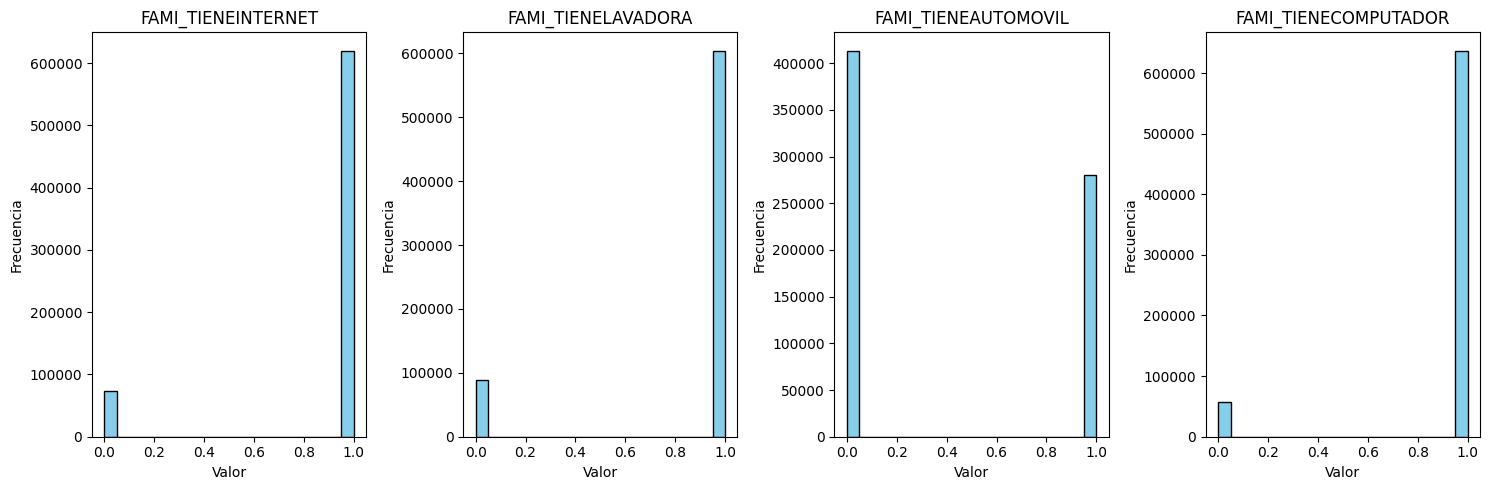

In [ ]:
import matplotlib.pyplot as plt

def plot_histograms(data, columns):
    fig, axs = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

    for i, columna in enumerate(columns):
        axs[i].hist(data[columna], bins=20, color='skyblue', edgecolor='black')
        axs[i].set_title(columna)
        axs[i].set_xlabel('Valor')
        axs[i].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# Definir las columnas de interés
columnas_de_interes = ['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR']

# Visualizar los histogramas de las columnas de interés después de la imputación
plot_histograms(datos_imputados, columnas_de_interes)

In [ ]:

print(train[columns_of_interest].dtypes)

FAMI_TIENEINTERNET      float64
FAMI_TIENELAVADORA      float64
FAMI_TIENEAUTOMOVIL     float64
FAMI_TIENECOMPUTADOR    float64
RENDIMIENTO_GLOBAL        int64
dtype: object


Despues de haber tratado estas columnas que tenian correlacion alta entre ellas nos queda tratar una columna más **'ESTU_PAGOMATRICULAPROPIO'** veamos más a fondo cómo se comporta está columna para saber cómo trabajar los datos faltantes     

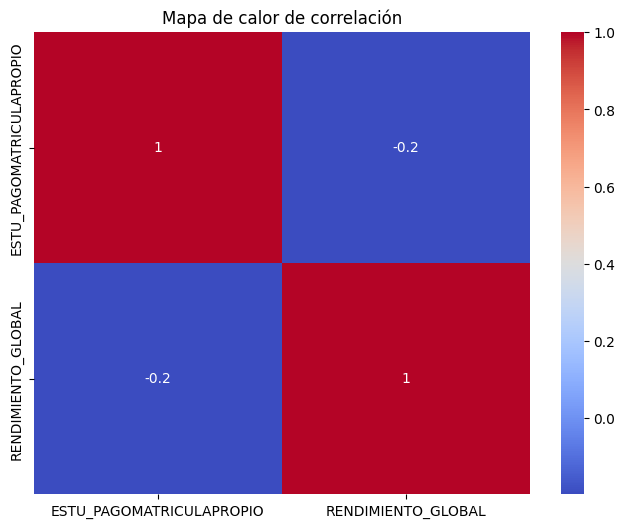

In [ ]:
# Mapa de calor de correlación entre 'ESTU_PAGOMATRICULAPROPIO y RENDIMIENTO_GLOBAL
plt.figure(figsize=(8, 6))
sns.heatmap(train[['ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

Podemos observar un correlacion baja con respecto a la variable a predecir, y cómo los datos faltantes equivalente aproximadamente al 1% de datos totales. Tomamos la decision de llenar los datos faltante directamente con 0, es decir tomaremos como que los estudiantes que no rellenaron está columna directamente no hacen un pago propio de su matricula

In [ ]:
# Llenar los valores faltantes en la columna 'ESTU_PAGOMATRICULAPROPIO' con '0'
train['ESTU_PAGOMATRICULAPROPIO'].fillna(0, inplace=True)

In [ ]:
train.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,1.0,Técnica o tecnológica incompleta,1.0,1.0,0,0.0,1.0,Postgrado,2
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,0.0,Técnica o tecnológica completa,1.0,0.0,0,0.0,1.0,Técnica o tecnológica incompleta,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1.0,Secundaria (Bachillerato) completa,1.0,0.0,0,0.0,0.0,Secundaria (Bachillerato) completa,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,1.0,No sabe,1.0,0.0,0,0.0,1.0,Secundaria (Bachillerato) completa,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,1.0,Primaria completa,1.0,1.0,0,0.0,1.0,Primaria completa,1
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,1.0,Educación profesional completa,1.0,1.0,0,0.0,1.0,Secundaria (Bachillerato) completa,2
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,1.0,Educación profesional incompleta,1.0,1.0,0,1.0,1.0,Técnica o tecnológica completa,3
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,1.0,Primaria incompleta,1.0,0.0,0,1.0,0.0,Secundaria (Bachillerato) incompleta,1
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,1.0,Secundaria (Bachillerato) completa,1.0,1.0,0,1.0,1.0,Educación profesional incompleta,1
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,1.0,Postgrado,1.0,1.0,0,1.0,1.0,Postgrado,3


Ahora vamos a identificar otra columna que tiene valores categoricos es decir son valores que puede tener un orden logico, en este caso identificamos las siguientes columnas que cumplen con lo que buscamos: **['FAMI_ESTRATOVIVIENDA']**
Vamos a inspeccionar esta columnas para saber que posibles valores tienen

In [ ]:
categoric_column = ['FAMI_ESTRATOVIVIENDA']

In [ ]:
c="FAMI_ESTRATOVIVIENDA"
train[c].value_counts()

FAMI_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64

In [ ]:
for c in categoric_column:
    print ("%10s"%c, np.unique(train[c].dropna()))

FAMI_ESTRATOVIVIENDA ['Estrato 1' 'Estrato 2' 'Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 6'
 'Sin Estrato']


In [ ]:
# Diccionario de mapeo para FAMI_ESTRATOVIVIENDA
mapeo_estrato = {'Sin Estrato': 0, 'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6}


# Aplicar mapeo a las columnas respectivas
train['FAMI_ESTRATOVIVIENDA'] = train['FAMI_ESTRATOVIVIENDA'].map(mapeo_estrato)

# Verificar los cambios
print(train[['FAMI_ESTRATOVIVIENDA']].head())

   FAMI_ESTRATOVIVIENDA
0                   3.0
1                   3.0
2                   3.0
3                   4.0
4                   3.0


In [ ]:
for c in train.columns:
    print ("%20s"%c, train[c].dtype)

In [ ]:
valores_faltantes_estrato = train['FAMI_ESTRATOVIVIENDA'].isnull().sum()
# Muestra los valores faltantes
print("Valores faltantes en FAMI_ESTRATOVIVIENDA:", valores_faltantes_estrato)

Valores faltantes en FAMI_ESTRATOVIVIENDA: 32137


tratamos los datos faltantes que debemos procesar, veamos cual puede ser la mejor opción para tratar estos datos

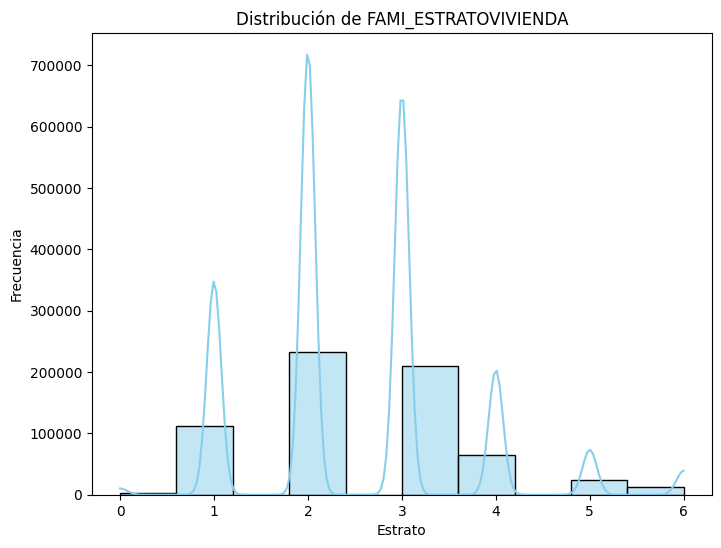

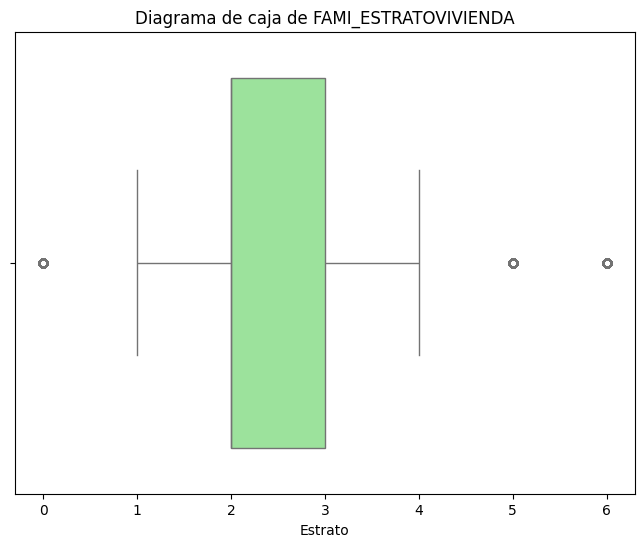

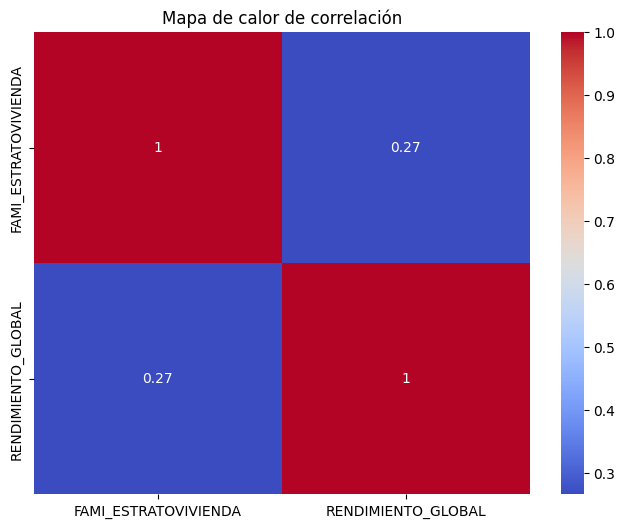

In [ ]:
# Histograma de FAMI_ESTRATOVIVIENDA
plt.figure(figsize=(8, 6))
sns.histplot(train['FAMI_ESTRATOVIVIENDA'], bins=10, kde=True, color='skyblue')
plt.title('Distribución de FAMI_ESTRATOVIVIENDA')
plt.xlabel('Estrato')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja de FAMI_ESTRATOVIVIENDA
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['FAMI_ESTRATOVIVIENDA'], color='lightgreen')
plt.title('Diagrama de caja de FAMI_ESTRATOVIVIENDA')
plt.xlabel('Estrato')
plt.show()

# Mapa de calor de correlación entre FAMI_ESTRATOVIVIENDA y RENDIMIENTO_GLOBAL
plt.figure(figsize=(8, 6))
sns.heatmap(train[['FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

In [ ]:
# Calcular la media y la mediana de FAMI_ESTRATOVIVIENDA
media_estrato = train['FAMI_ESTRATOVIVIENDA'].mean()
mediana_estrato = train['FAMI_ESTRATOVIVIENDA'].median()

# Imputar los valores faltantes con la media
train['FAMI_ESTRATOVIVIENDA'] = train['FAMI_ESTRATOVIVIENDA'].fillna(media_estrato)

# Verificar que no hay valores faltantes después de la imputación
print(train[['FAMI_ESTRATOVIVIENDA']].isnull().sum())

FAMI_ESTRATOVIVIENDA    0
dtype: int64


In [ ]:
media_estrato

2.521513167757733

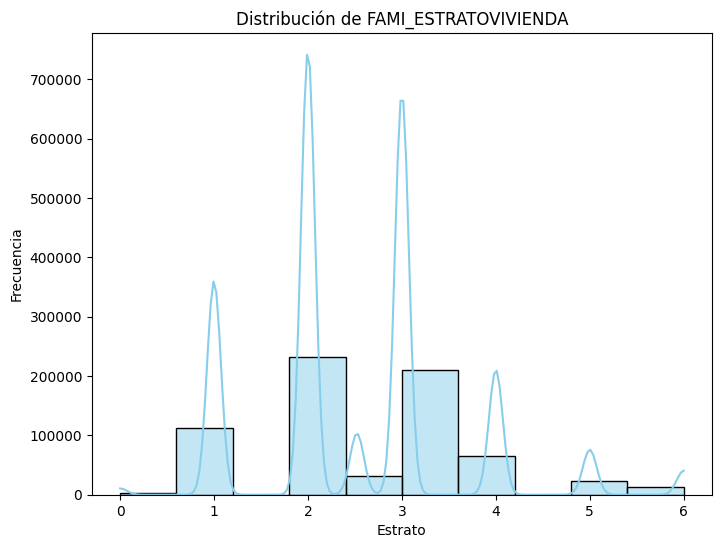

In [ ]:
# Histograma de FAMI_ESTRATOVIVIENDA
plt.figure(figsize=(8, 6))
sns.histplot(train['FAMI_ESTRATOVIVIENDA'], bins=10, kde=True, color='skyblue')
plt.title('Distribución de FAMI_ESTRATOVIVIENDA')
plt.xlabel('Estrato')
plt.ylabel('Frecuencia')
plt.show()

El proceso que realizamos para arreglar estos datos faltantes, fue sacando su media y asignandosela a los datos faltantes, eso nos daba un valor decimal, que más adelante terminaremos transformando en entero, lo importante de esto, es que los datos faltantes quedaron todos valiendo **'2'** y teniendo la proporcion de datos faltantes, con la cantidad de datos totales, no es una cifra significativa, por lo tanto optamos por dejarlos ahí.
<br>
*Cabe mencionar que esta es solo una alternativa que yo use, existen otras alternativas quizas mejores*

In [ ]:
train['FAMI_ESTRATOVIVIENDA'] = train['FAMI_ESTRATOVIVIENDA'].astype(int)

# Verificar el cambio
print(train['FAMI_ESTRATOVIVIENDA'].dtype)

int64


In [ ]:
c="FAMI_ESTRATOVIVIENDA"
train[c].value_counts()

FAMI_ESTRATOVIVIENDA
2    264808
3    210685
1    111991
4     65514
5     23608
6     12605
0      3289
Name: count, dtype: int64

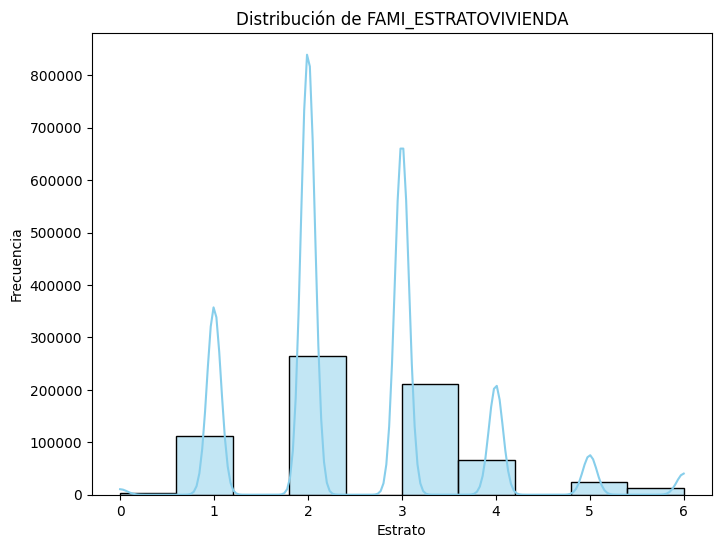

In [ ]:
# Histograma de FAMI_ESTRATOVIVIENDA
plt.figure(figsize=(8, 6))
sns.histplot(train['FAMI_ESTRATOVIVIENDA'], bins=10, kde=True, color='skyblue')
plt.title('Distribución de FAMI_ESTRATOVIVIENDA')
plt.xlabel('Estrato')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
train.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,3,1.0,Técnica o tecnológica incompleta,1.0,1.0,0,0.0,1.0,Postgrado,2
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,3,0.0,Técnica o tecnológica completa,1.0,0.0,0,0.0,1.0,Técnica o tecnológica incompleta,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,3,1.0,Secundaria (Bachillerato) completa,1.0,0.0,0,0.0,0.0,Secundaria (Bachillerato) completa,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,4,1.0,No sabe,1.0,0.0,0,0.0,1.0,Secundaria (Bachillerato) completa,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,3,1.0,Primaria completa,1.0,1.0,0,0.0,1.0,Primaria completa,1
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,5,1.0,Educación profesional completa,1.0,1.0,0,0.0,1.0,Secundaria (Bachillerato) completa,2
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,2,1.0,Educación profesional incompleta,1.0,1.0,0,1.0,1.0,Técnica o tecnológica completa,3
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,2,1.0,Primaria incompleta,1.0,0.0,0,1.0,0.0,Secundaria (Bachillerato) incompleta,1
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,1,1.0,Secundaria (Bachillerato) completa,1.0,1.0,0,1.0,1.0,Educación profesional incompleta,1
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,5,1.0,Postgrado,1.0,1.0,0,1.0,1.0,Postgrado,3


Bien hasta este punto vale la pena hacer una recuento de lo que hemos hecho en este colab, hasta este punto hemos hecho lo siguiente:
  
<br>

  *   Transformamos la columna a predecir en valores números
  *   Transformamos las columnas que tenian solamente 'No' y 'Si'
  *   Transformamos una columna categorica
<br>

Ahora es necesario tratar las columnas con variables continuas, es decir: las columnas que expresan los valores en cierto rango. En este caso las columnas que vamos a tratar serian: **['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA']**



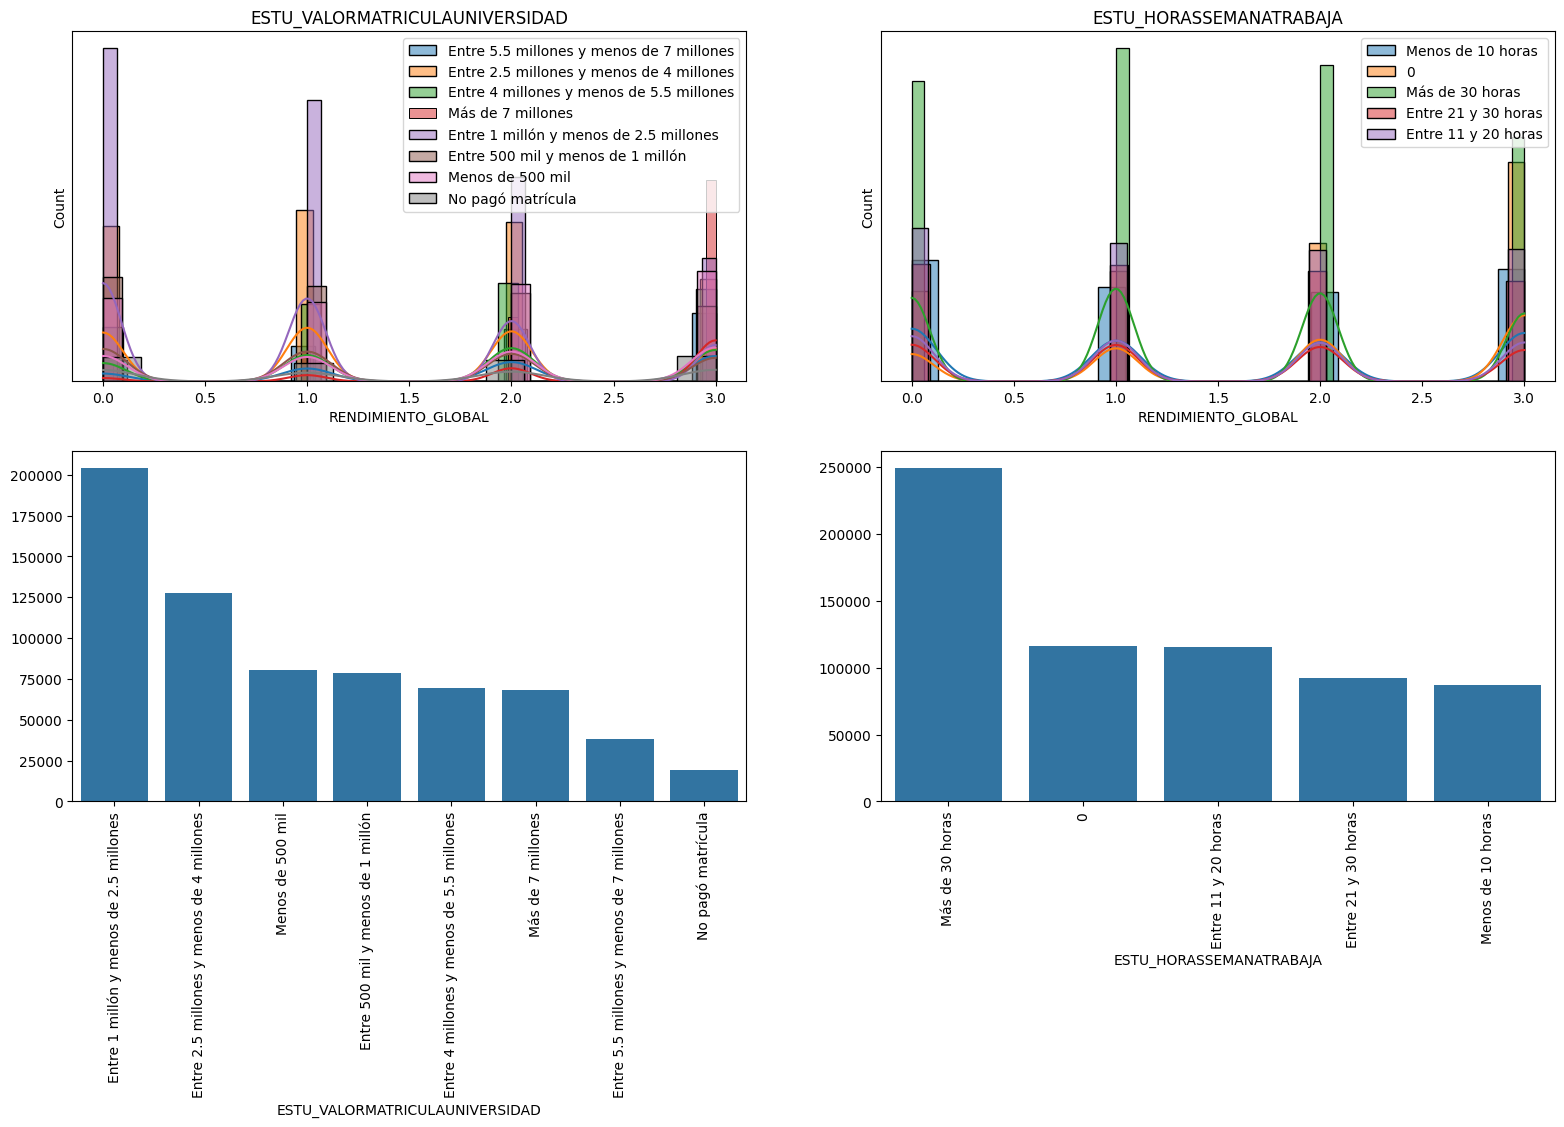

In [ ]:
plt.figure(figsize=(40,10))
for i, c in enumerate(["ESTU_VALORMATRICULAUNIVERSIDAD", "ESTU_HORASSEMANATRABAJA"]):
    plt.subplot(2,4,i+1)
    k = train[[c,"RENDIMIENTO_GLOBAL"]].dropna()
    for v in train[c].dropna().unique():
        sns.histplot(k.RENDIMIENTO_GLOBAL[k[c]==v], label=v, kde=True)
        plt.title(c)
    plt.yticks([])
    plt.legend()
    plt.subplot(2,4,i+5)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation="vertical")

Con estas gráficas podemos darnos cuenta de cosas
muy interesantes, entre ellas estan.


*   Hay mayor cantidad de estudiantes que pagan entre 1 y 2.5 millones en su matricula al igual que hay una gran cantidad de estudiantes que trabajan más de 30 horas
*   Se ve que los estudiantes que pagan más de 7 millones son más propensos a sacar un nivel alto en la prueba



In [ ]:
continue_variables = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA']

In [ ]:
for c in continue_variables:
    print ("%10s"%c, np.unique(train[c].dropna()))

ESTU_VALORMATRICULAUNIVERSIDAD ['Entre 1 millón y menos de 2.5 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones'
 'Entre 5.5 millones y menos de 7 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'Más de 7 millones' 'No pagó matrícula']
ESTU_HORASSEMANATRABAJA ['0' 'Entre 11 y 20 horas' 'Entre 21 y 30 horas' 'Menos de 10 horas'
 'Más de 30 horas']


In [ ]:

# Definir el mapeo de categorías a valores numéricos para cada columna
mapeo_valores_matricula = {
    'Menos de 500 mil': 0,
    'Entre 500 mil y menos de 1 millón': 1,
    'Entre 1 millón y menos de 2.5 millones': 2,
    'Entre 2.5 millones y menos de 4 millones': 3,
    'Entre 4 millones y menos de 5.5 millones': 4,
    'Entre 5.5 millones y menos de 7 millones': 5,
    'Más de 7 millones': 6,
    'No pagó matrícula': 7
}

mapeo_valores_horas_trabajo = {
    '0': 0,
    'Menos de 10 horas': 1,
    'Entre 11 y 20 horas': 2,
    'Entre 21 y 30 horas': 3,
    'Más de 30 horas': 4
}

# Convertir las columnas a formato numérico utilizando el mapeo
train['ESTU_VALORMATRICULAUNIVERSIDAD'] = train['ESTU_VALORMATRICULAUNIVERSIDAD'].map(mapeo_valores_matricula)
train['ESTU_HORASSEMANATRABAJA'] = train['ESTU_HORASSEMANATRABAJA'].map(mapeo_valores_horas_trabajo)

# Verificar los cambios
print(train[['ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA']].head())


   ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA
0                             5.0                      1.0
1                             3.0                      0.0
2                             3.0                      4.0
3                             4.0                      0.0
4                             3.0                      3.0


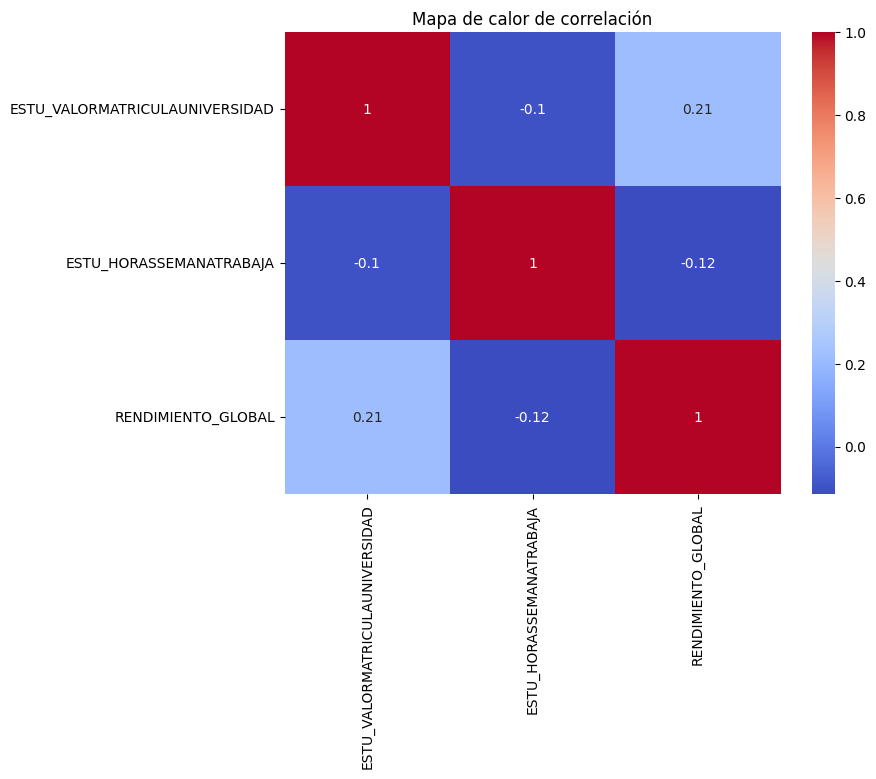

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(train[['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'RENDIMIENTO_GLOBAL']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

In [ ]:
# veamos cuantos datos faltantes hay en estas columnas
valores_faltantes_matricula = train['ESTU_VALORMATRICULAUNIVERSIDAD'].isnull().sum()
valores_faltantes_horas_trabajo = train['ESTU_HORASSEMANATRABAJA'].isnull().sum()
# Muestra los valores faltantes
print("Valores faltantes en ESTU_VALORMATRICULAUNIVERSIDAD:", valores_faltantes_matricula)
print("Valores faltantes en ESTU_HORASSEMANATRABAJA:", valores_faltantes_horas_trabajo)


Valores faltantes en ESTU_VALORMATRICULAUNIVERSIDAD: 6287
Valores faltantes en ESTU_HORASSEMANATRABAJA: 30857


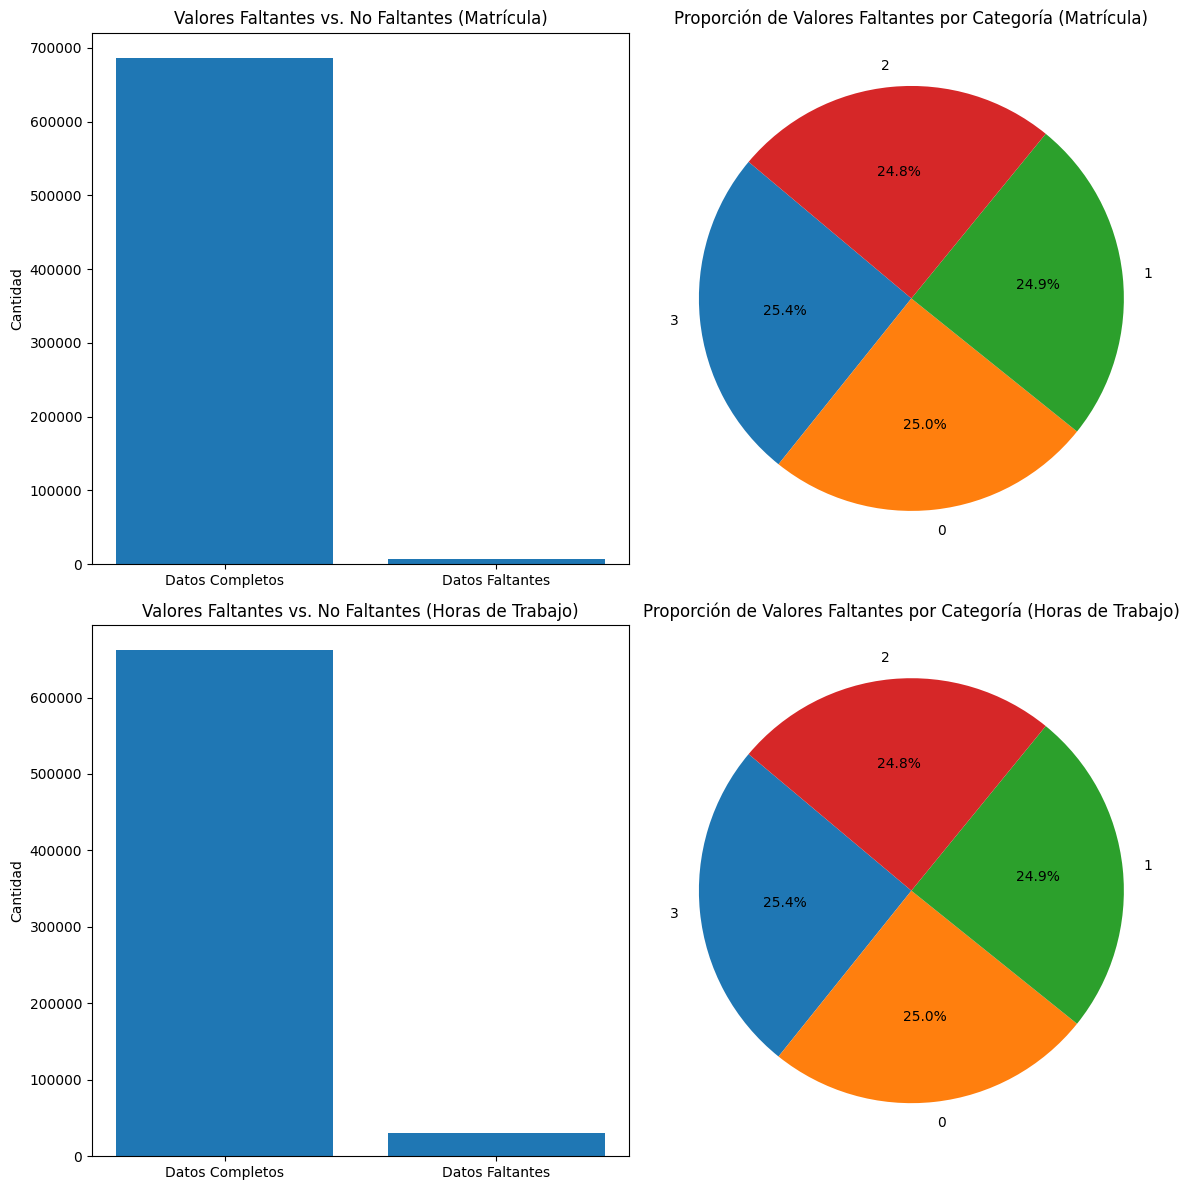

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de valores faltantes y no faltantes para ESTU_VALORMATRICULAUNIVERSIDAD
valores_faltantes_matricula = train['ESTU_VALORMATRICULAUNIVERSIDAD'].isnull().sum()
non_valores_faltantes_matricula = len(train) - valores_faltantes_matricula

# Contar la cantidad de valores faltantes y no faltantes para ESTU_HORASSEMANATRABAJA
valores_faltantes_horas_trabajo = train['ESTU_HORASSEMANATRABAJA'].isnull().sum()
non_valores_faltantes_horas_trabajo = len(train) - valores_faltantes_horas_trabajo

# Contar la cantidad de valores únicos en la columna de RENDIMIENTO_GLOBAL
rendimiento_counts = train['RENDIMIENTO_GLOBAL'].value_counts()

# Crear una figura de dos subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Gráfico de barras para ESTU_VALORMATRICULAUNIVERSIDAD
axs[0, 0].bar(['Datos Completos', 'Datos Faltantes'], [non_valores_faltantes_matricula, valores_faltantes_matricula])
axs[0, 0].set_title('Valores Faltantes vs. No Faltantes (Matrícula)')
axs[0, 0].set_ylabel('Cantidad')

# Gráfico de torta para mostrar la proporción de valores faltantes en cada categoría de RENDIMIENTO_GLOBAL (Matrícula)
axs[0, 1].pie(rendimiento_counts, labels=rendimiento_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Proporción de Valores Faltantes por Categoría (Matrícula)')

# Gráfico de barras para ESTU_HORASSEMANATRABAJA
axs[1, 0].bar(['Datos Completos', 'Datos Faltantes'], [non_valores_faltantes_horas_trabajo, valores_faltantes_horas_trabajo])
axs[1, 0].set_title('Valores Faltantes vs. No Faltantes (Horas de Trabajo)')
axs[1, 0].set_ylabel('Cantidad')

# Gráfico de torta para mostrar la proporción de valores faltantes en cada categoría de RENDIMIENTO_GLOBAL (Horas de Trabajo)
axs[1, 1].pie(rendimiento_counts, labels=rendimiento_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Proporción de Valores Faltantes por Categoría (Horas de Trabajo)')

plt.tight_layout()
plt.show()


Según el estudio que acabamos de realizar nos dice que la columna **ESTU_VALORMATRICULAUNIVERSIDAD** tiene más correlacion con respecto a nuestra variable a predecir y como está tiene menos datos faltantes optamos por reemplazarlos por la media de los datos ya existentes.
<br>

y puesto que la columna **ESTU_HORASSEMANATRABAJA** tiene mucha menos correlacion con nuestra variable a predecir, optamos por rellenar los datos faltantes de una forma aleatoria.

In [ ]:

# Calcular la media total de la columna ESTU_VALORMATRICULAUNIVERSIDAD
media_valormatricula = train['ESTU_VALORMATRICULAUNIVERSIDAD'].mean()

# Remplazar los valores faltantes en ESTU_VALORMATRICULAUNIVERSIDAD con la media total
train['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(media_valormatricula, inplace=True)

# Obtener los valores únicos en la columna ESTU_HORASSEMANATRABAJA
valores_horas_trabajo = train['ESTU_HORASSEMANATRABAJA'].dropna().unique()

# Calcular la cantidad de valores faltantes en ESTU_HORASSEMANATRABAJA
num_valores_faltantes = train['ESTU_HORASSEMANATRABAJA'].isnull().sum()

# Remplazar los valores faltantes en ESTU_HORASSEMANATRABAJA de forma aleatoria
train.loc[train['ESTU_HORASSEMANATRABAJA'].isnull(), 'ESTU_HORASSEMANATRABAJA'] = np.random.choice(valores_horas_trabajo, num_valores_faltantes)



In [ ]:
valores_faltantes = train.isnull().sum()

# Muestra los valores faltantes
print(valores_faltantes)

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD        0
ESTU_HORASSEMANATRABAJA               0
FAMI_ESTRATOVIVIENDA                  0
FAMI_TIENEINTERNET                    0
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                    0
FAMI_TIENEAUTOMOVIL                   0
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO              0
FAMI_TIENECOMPUTADOR                  0
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
dtype: int64


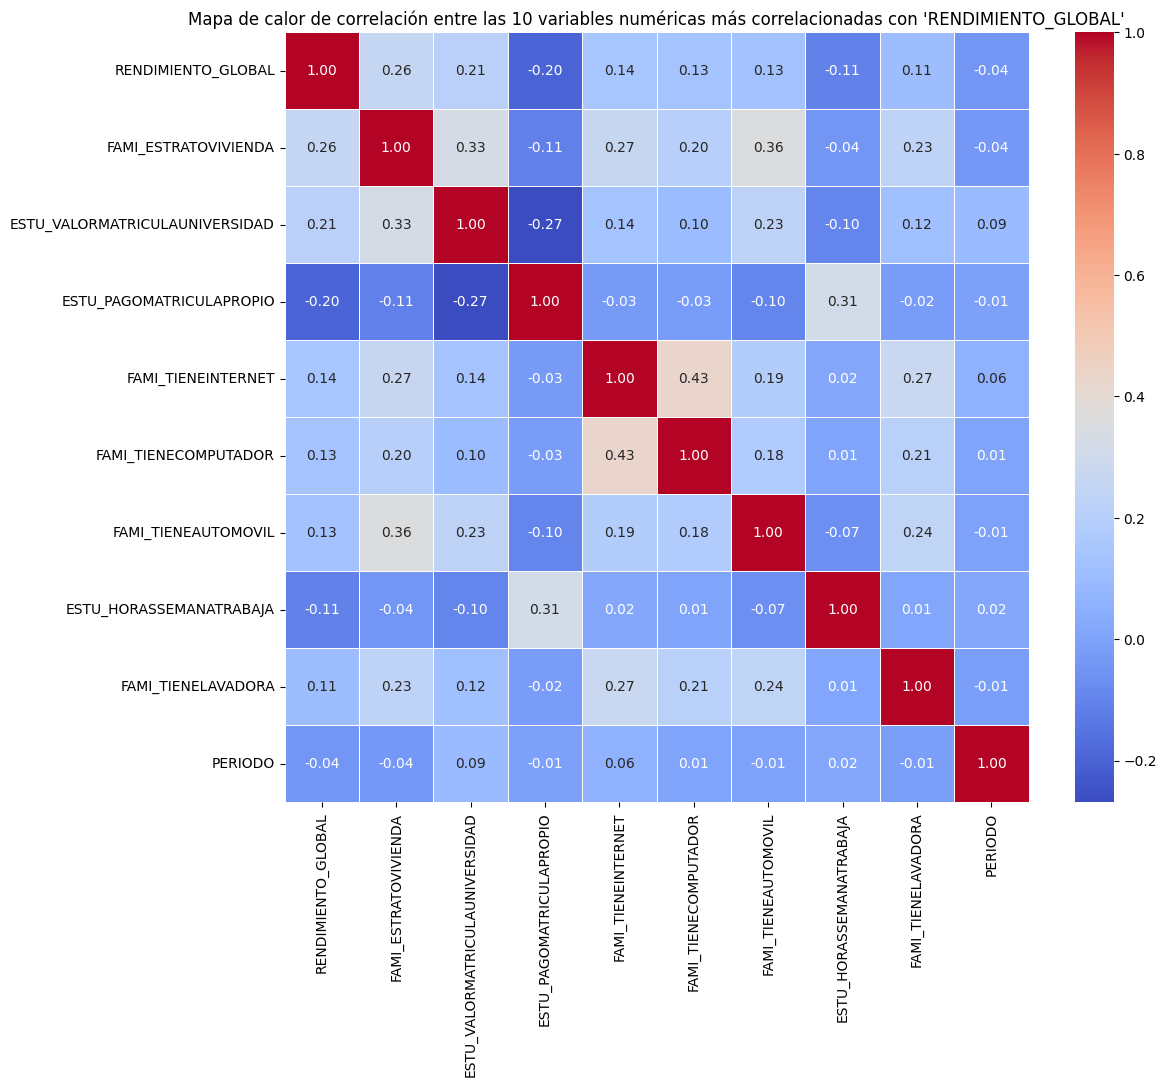

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas del DataFrame
numeric_cols = train.select_dtypes(include=['int', 'float']).columns

# Calcular la matriz de correlación entre las variables numéricas y la variable objetivo
correlation_matrix = train[numeric_cols].corrwith(train['RENDIMIENTO_GLOBAL'])

# Ordenar las correlaciones en valor absoluto
correlation_matrix_abs = correlation_matrix.abs().sort_values(ascending=False)

# Seleccionar las 10 variables con mayor correlación (positiva o negativa) con la variable objetivo
top_correlated_features = correlation_matrix_abs.head(10)

# Seleccionar las variables correspondientes de la matriz de correlación
top_correlation_matrix = train[top_correlated_features.index].corr()

# Crear el mapa de calor de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Mapa de calor de correlación entre las 10 variables numéricas más correlacionadas con 'RENDIMIENTO_GLOBAL'")
plt.show()


# Cómo vamos?
Y bien despues de hacer la respectiva limpieza de datos, usando diferentes metodos para rellenar datos faltantes, y transformar las diferentes columnas en valores numericos con los que podamos trabajar es hora de plantear una alternativa para la columnas **'FAMI_EDUCACIONPADRE'** & **FAMI_EDUCACIONMADRE** ya que estás representan las únicas columnas con valores faltantes que nos quedaron, ahora no podemos usar el mismo enfoque anterior puesto que a diferencias de estas, no hay forma de clasificar todas las opciones en un orden de jerarquía además si observamos más a detalle, hay valores que significan lo mismo o parcialmente lo mismo como lo pueden ser **['Educación profesional completa' 'Educación profesional incompleta'
 'Ninguno' 'No Aplica' 'No sabe']** por lo tanto una alternativa a estas columnas es la estrategia de "*one-hot* "

Primero rellenemos los datos faltantes con está vez la moda de las columnas.


In [ ]:
# Calcula la moda para las columnas seleccionadas
moda_padre = train['FAMI_EDUCACIONPADRE'].mode()[0]
moda_madre = train['FAMI_EDUCACIONMADRE'].mode()[0]

# Rellena los valores faltantes con la moda
train['FAMI_EDUCACIONPADRE'].fillna(moda_padre, inplace=True)
train['FAMI_EDUCACIONMADRE'].fillna(moda_madre, inplace=True)

# Verifica que ya no haya datos faltantes
print(train.isnull().sum())

ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_TIENELAVADORA                0
FAMI_TIENEAUTOMOVIL               0
ESTU_PRIVADO_LIBERTAD             0
ESTU_PAGOMATRICULAPROPIO          0
FAMI_TIENECOMPUTADOR              0
FAMI_EDUCACIONMADRE               0
RENDIMIENTO_GLOBAL                0
dtype: int64


In [ ]:
import pandas as pd

# Aplicar one-hot encoding a las columnas 'FAMI_EDUCACIONPADRE' y 'FAMI_EDUCACIONMADRE'
train = pd.get_dummies(train, columns=['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'], prefix=['PADRE_EDUCACION', 'MADRE_EDUCACION'])

# Mostrar las primeras filas del DataFrame resultante
print(train.head())

       ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212                  ENFERMERIA                 BOGOTÁ   
1  645256    20212                     DERECHO              ATLANTICO   
2  308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTÁ   
3  470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4  989032    20212                  PSICOLOGIA              ANTIOQUIA   

   ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                             5.0                      1.0   
1                             3.0                      0.0   
2                             3.0                      4.0   
3                             4.0                      0.0   
4                             3.0                      3.0   

   FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  FAMI_TIENELAVADORA  \
0                     3                 1.0                 1.0   
1                     3                 0.0           

In [ ]:
# Asignar 0 para False y 1 para True en las columnas generadas por one-hot encoding
train.replace({True: 1, False: 0}, inplace=True)

# Verificar los cambios
print(train.head(10))


       ID  PERIODO                  ESTU_PRGM_ACADEMICO  \
0  904256    20212                           ENFERMERIA   
1  645256    20212                              DERECHO   
2  308367    20203                MERCADEO Y PUBLICIDAD   
3  470353    20195           ADMINISTRACION DE EMPRESAS   
4  989032    20212                           PSICOLOGIA   
5  659872    20203                 MEDICINA VETERINARIA   
6   47159    20183                  INGENIERIA MECANICA   
7   11829    20183  ADMINISTRACIÓN EN SALUD OCUPACIONAL   
8  257869    20212                INGENIERIA INDUSTRIAL   
9  465511    20183           ADMINISTRACION DE EMPRESAS   

  ESTU_PRGM_DEPARTAMENTO  ESTU_VALORMATRICULAUNIVERSIDAD  \
0                 BOGOTÁ                             5.0   
1              ATLANTICO                             3.0   
2                 BOGOTÁ                             3.0   
3              SANTANDER                             4.0   
4              ANTIOQUIA                          

In [ ]:
# Columnas que deben convertirse a enteros
columnas_float_a_entero = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
                           'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
                           'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR']

# Convertir las columnas de float a enteros
train[columnas_float_a_entero] = train[columnas_float_a_entero].astype(int)

# Verificar los cambios
print(train.dtypes)

ID                                                       int64
PERIODO                                                  int64
ESTU_PRGM_ACADEMICO                                     object
ESTU_PRGM_DEPARTAMENTO                                  object
ESTU_VALORMATRICULAUNIVERSIDAD                           int64
ESTU_HORASSEMANATRABAJA                                  int64
FAMI_ESTRATOVIVIENDA                                     int64
FAMI_TIENEINTERNET                                       int64
FAMI_TIENELAVADORA                                       int64
FAMI_TIENEAUTOMOVIL                                      int64
ESTU_PRIVADO_LIBERTAD                                    int64
ESTU_PAGOMATRICULAPROPIO                                 int64
FAMI_TIENECOMPUTADOR                                     int64
RENDIMIENTO_GLOBAL                                       int64
PADRE_EDUCACION_Educación profesional completa           int64
PADRE_EDUCACION_Educación profesional incompleta       

In [ ]:
train.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,...,MADRE_EDUCACION_Ninguno,MADRE_EDUCACION_No Aplica,MADRE_EDUCACION_No sabe,MADRE_EDUCACION_Postgrado,MADRE_EDUCACION_Primaria completa,MADRE_EDUCACION_Primaria incompleta,MADRE_EDUCACION_Secundaria (Bachillerato) completa,MADRE_EDUCACION_Secundaria (Bachillerato) incompleta,MADRE_EDUCACION_Técnica o tecnológica completa,MADRE_EDUCACION_Técnica o tecnológica incompleta
0,904256,20212,ENFERMERIA,BOGOTÁ,5,1,3,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1,645256,20212,DERECHO,ATLANTICO,3,0,3,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3,4,3,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4,0,4,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3,3,3,1,1,1,...,0,0,0,0,1,0,0,0,0,0
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,6,1,5,1,1,1,...,0,0,0,0,0,0,1,0,0,0
6,47159,20183,INGENIERIA MECANICA,HUILA,3,3,2,1,1,1,...,0,0,0,0,0,0,0,0,1,0
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,2,2,2,1,1,0,...,0,0,0,0,0,0,0,1,0,0
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,5,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,3,4,5,1,1,1,...,0,0,0,1,0,0,0,0,0,0


Ahora tenemos la necesidad de trabajar las 2 columnas que más peso tienen en nuestro modelo, y estamos hablando de **[ESTU_PRGM_ACADEMICO, ESTU_PRGM_DEPARTAMENTO]**

*¿Qué estrategía usaremos ?*


*   la columna **'ESTU_PRGM_DEPARTAMENTO'** la repartiremos por Regiones de colombia y despues realizaremos one-hot con ellas
*   la Columna **'ESTU_PRGM_ACADEMICO'** Nos basaremos en el regimen educativo que existe en la universidad, filtrando los diferentes '948' Datos



In [ ]:
# Verificamos que esten los 30 Departamentos.
c="ESTU_PRGM_DEPARTAMENTO"
train[c].value_counts()

ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64

In [ ]:

# Definir las regiones y los departamentos correspondientes
departamentos_por_region = {
    'Region Caribe': ['ATLANTICO', 'BOLIVAR', 'CORDOBA', 'CESAR' 'LA GUAJIRA', 'MAGDALENA', 'SUCRE', 'SAN ANDRES'],
    'Region Andina': ['ANTIOQUIA', 'BOYACA', 'CUNDINAMARCA', 'RISARALDA', 'TOLIMA', 'CALDAS', 'CAUCA', 'HUILA', 'NORTE SANTANDER', 'QUINDIO', 'SANTANDER', 'BOGOTA'],
    'Region Pacifica': ['CHOCO', 'NARIÑO', 'VALLE'],
    'Region Orinoquia': ['ARAUCA', 'CASANARE', 'META'],
    'Region Amazonica': ['AMAZONAS', 'CAQUETA', 'GUAVIARE', 'VAUPES', 'PUTUMAYO'],
}
# Prefijo para los nombres de las nuevas columnas
prefijo_columnas = 'DEPARTAMENTO_'

# Crear columnas para cada región y asignar los departamentos correspondientes
for region, departamentos in departamentos_por_region.items():
    train[prefijo_columnas + region.replace(' ', '_').upper()] = train['ESTU_PRGM_DEPARTAMENTO'].apply(lambda x: x if x in departamentos else None)

# Eliminar la columna original ESTU_PRGM_DEPARTAMENTO
train.drop(columns=['ESTU_PRGM_DEPARTAMENTO'], inplace=True)


print(train)

            ID  PERIODO                  ESTU_PRGM_ACADEMICO  \
0       904256    20212                           ENFERMERIA   
1       645256    20212                              DERECHO   
2       308367    20203                MERCADEO Y PUBLICIDAD   
3       470353    20195           ADMINISTRACION DE EMPRESAS   
4       989032    20212                           PSICOLOGIA   
...        ...      ...                                  ...   
692495   25096    20195                             BIOLOGIA   
692496  754213    20212                           PSICOLOGIA   
692497  504185    20183  ADMINISTRACIÓN EN SALUD OCUPACIONAL   
692498  986620    20195                           PSICOLOGIA   
692499  933374    20195                           PSICOLOGIA   

        ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                                    5                        1   
1                                    3                        0   
2                             

In [ ]:
train.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,...,MADRE_EDUCACION_Primaria incompleta,MADRE_EDUCACION_Secundaria (Bachillerato) completa,MADRE_EDUCACION_Secundaria (Bachillerato) incompleta,MADRE_EDUCACION_Técnica o tecnológica completa,MADRE_EDUCACION_Técnica o tecnológica incompleta,DEPARTAMENTO_REGION_CARIBE,DEPARTAMENTO_REGION_ANDINA,DEPARTAMENTO_REGION_PACIFICA,DEPARTAMENTO_REGION_ORINOQUIA,DEPARTAMENTO_REGION_AMAZONICA
0,904256,20212,ENFERMERIA,5,1,3,1,1,1,0,...,0,0,0,0,0,None,None,None,None,None
1,645256,20212,DERECHO,3,0,3,0,1,0,0,...,0,0,0,0,1,ATLANTICO,None,None,None,None
2,308367,20203,MERCADEO Y PUBLICIDAD,3,4,3,1,1,0,0,...,0,1,0,0,0,None,None,None,None,None
3,470353,20195,ADMINISTRACION DE EMPRESAS,4,0,4,1,1,0,0,...,0,1,0,0,0,None,SANTANDER,None,None,None
4,989032,20212,PSICOLOGIA,3,3,3,1,1,1,0,...,0,0,0,0,0,None,ANTIOQUIA,None,None,None
5,659872,20203,MEDICINA VETERINARIA,6,1,5,1,1,1,0,...,0,1,0,0,0,None,ANTIOQUIA,None,None,None
6,47159,20183,INGENIERIA MECANICA,3,3,2,1,1,1,0,...,0,0,0,1,0,None,HUILA,None,None,None
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,2,2,2,1,1,0,0,...,0,0,1,0,0,None,None,None,None,None
8,257869,20212,INGENIERIA INDUSTRIAL,5,1,1,1,1,1,0,...,0,0,0,0,0,ATLANTICO,None,None,None,None
9,465511,20183,ADMINISTRACION DE EMPRESAS,3,4,5,1,1,1,0,...,0,0,0,0,0,None,ANTIOQUIA,None,None,None


In [ ]:
train.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'RENDIMIENTO_GLOBAL', 'PADRE_EDUCACION_Educación profesional completa',
       'PADRE_EDUCACION_Educación profesional incompleta',
       'PADRE_EDUCACION_Ninguno', 'PADRE_EDUCACION_No Aplica',
       'PADRE_EDUCACION_No sabe', 'PADRE_EDUCACION_Postgrado',
       'PADRE_EDUCACION_Primaria completa',
       'PADRE_EDUCACION_Primaria incompleta',
       'PADRE_EDUCACION_Secundaria (Bachillerato) completa',
       'PADRE_EDUCACION_Secundaria (Bachillerato) incompleta',
       'PADRE_EDUCACION_Técnica o tecnológica completa',
       'PADRE_EDUCACION_Técnica o tecnológica incompleta',
       'MADRE_EDUCACION_Educación profesional completa',
       'MADRE_EDUCACION_Educación profesional

In [ ]:

# Crear el mapeo para cada región
map_recurrencia_caribe = {'SAN ANDRES': 1, 'LA GUAJIRA': 2, 'CESAR': 3, 'SUCRE': 4, 'MAGDALENA': 5, 'CORDOBA': 6, 'BOLIVAR': 7, 'NORTE SANTANDER': 8, 'ATLANTICO': 9}
map_recurrencia_andina = {'QUINDIO': 1, 'HUILA': 2, 'CAUCA': 3, 'CALDAS': 4, 'TOLIMA': 5, 'RISARALDA': 6, 'CUNDINAMARCA': 7, 'BOYACA': 8, 'SANTANDER': 9, 'ANTIOQUIA': 10, 'BOGOTA': 11}
map_recurrencia_pacifica = {'CHOCO': 1, 'NARIÑO': 2, 'VALLE': 3}
map_recurrencia_orinoquia = {'ARAUCA': 1, 'CASANARE': 2, 'META': 3}
map_recurrencia_amazonica = {'VAUPES': 1, 'GUAVIARE': 2, 'AMAZONAS': 3, 'PUTUMAYO': 4, 'CAQUETA': 5}


train['DEPARTAMENTO_REGION_CARIBE'] = train['DEPARTAMENTO_REGION_CARIBE'].map(map_recurrencia_caribe)
train['DEPARTAMENTO_REGION_ANDINA'] = train['DEPARTAMENTO_REGION_ANDINA'].map(map_recurrencia_andina)
train['DEPARTAMENTO_REGION_PACIFICA'] = train['DEPARTAMENTO_REGION_PACIFICA'].map(map_recurrencia_pacifica)
train['DEPARTAMENTO_REGION_ORINOQUIA'] = train['DEPARTAMENTO_REGION_ORINOQUIA'].map(map_recurrencia_orinoquia)
train['DEPARTAMENTO_REGION_AMAZONICA'] = train['DEPARTAMENTO_REGION_AMAZONICA'].map(map_recurrencia_amazonica)

In [ ]:
train.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,...,MADRE_EDUCACION_Primaria incompleta,MADRE_EDUCACION_Secundaria (Bachillerato) completa,MADRE_EDUCACION_Secundaria (Bachillerato) incompleta,MADRE_EDUCACION_Técnica o tecnológica completa,MADRE_EDUCACION_Técnica o tecnológica incompleta,DEPARTAMENTO_REGION_CARIBE,DEPARTAMENTO_REGION_ANDINA,DEPARTAMENTO_REGION_PACIFICA,DEPARTAMENTO_REGION_ORINOQUIA,DEPARTAMENTO_REGION_AMAZONICA
0,904256,20212,ENFERMERIA,5,1,3,1,1,1,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,645256,20212,DERECHO,3,0,3,0,1,0,0,...,0,0,0,0,1,9.0,NaN,NaN,NaN,NaN
2,308367,20203,MERCADEO Y PUBLICIDAD,3,4,3,1,1,0,0,...,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN
3,470353,20195,ADMINISTRACION DE EMPRESAS,4,0,4,1,1,0,0,...,0,1,0,0,0,NaN,9.0,NaN,NaN,NaN
4,989032,20212,PSICOLOGIA,3,3,3,1,1,1,0,...,0,0,0,0,0,NaN,10.0,NaN,NaN,NaN
5,659872,20203,MEDICINA VETERINARIA,6,1,5,1,1,1,0,...,0,1,0,0,0,NaN,10.0,NaN,NaN,NaN
6,47159,20183,INGENIERIA MECANICA,3,3,2,1,1,1,0,...,0,0,0,1,0,NaN,2.0,NaN,NaN,NaN
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,2,2,2,1,1,0,0,...,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN
8,257869,20212,INGENIERIA INDUSTRIAL,5,1,1,1,1,1,0,...,0,0,0,0,0,9.0,NaN,NaN,NaN,NaN
9,465511,20183,ADMINISTRACION DE EMPRESAS,3,4,5,1,1,1,0,...,0,0,0,0,0,NaN,10.0,NaN,NaN,NaN


In [ ]:
columnas_a_reemplazar = ['DEPARTAMENTO_REGION_CARIBE', 'DEPARTAMENTO_REGION_ANDINA', 'DEPARTAMENTO_REGION_PACIFICA', 'DEPARTAMENTO_REGION_ORINOQUIA', 'DEPARTAMENTO_REGION_AMAZONICA']
train[columnas_a_reemplazar] = train[columnas_a_reemplazar].fillna(0).astype(int)

Ahora llegamos a la parte final de nuestro analisis de datos, nos presentamos ante la columna ESTU_PRGM_ACADEMICO vamos a implementar la estrategia antes mencionada.

In [ ]:
import pandas as pd
import re

# Función para categorizar las carreras
def categorize_career(career):
    career_lower = unidecode(career.lower())  # Convertir a minúsculas y eliminar tildes
    career_groups = {
        'Ingeniería': ['ingenieria', 'ing'],
        'Educación': ['educacion', 'pedagogia'],
        'Salud': ['medicina', 'odontologia', 'enferme', 'psic'],
        'Administracion': ['adminis', 'negoc', 'banca', 'comercio', 'mercade'],
        'Humanas': ['antropolo', 'estudios', 'filolo', 'filoso', 'sociolog', 'teolog'],
        'Artes': ['arte', 'cine', 'foto', 'musica'],
        'Ciencias': ['astronomia', 'bacteriologia', 'biolog', 'ciencia'],
        'Comuniciones': ['comunicaci'],
        'Construcciones': ['construcc'],
        'Economia': ['contadur', 'econom', 'finanz'],
        'Diseño': ['dise', 'diseño'],
        'Exactas': ['fisica', 'geografia', 'matem', 'microbiolo', 'quimica'],
        'Licenciaturas': ['licenciatura'],
        'Profesional': ['profesional'],
    }

    for category, keywords in career_groups.items():
        for keyword in keywords:
            if keyword in career_lower:
                return category

    return 'Otro'

# Aplicar la función a la columna 'ESTU_PRGM_ACADEMICO' para obtener las categorías
train['Categoria'] = train['ESTU_PRGM_ACADEMICO'].apply(categorize_career)

# Crear una nueva columna para cada categoría y asignar los valores correspondientes
for category in train['Categoria'].unique():
    train['ESTU_PRGM_ACADEMICO_' + category] = train['Categoria'] == category
    train.loc[train['ESTU_PRGM_ACADEMICO_' + category], 'ESTU_PRGM_ACADEMICO_' + category] = train.loc[train['ESTU_PRGM_ACADEMICO_' + category], 'ESTU_PRGM_ACADEMICO']

# Mostrar las primeras filas del dataframe con las nuevas columnas
print(train.head())


       ID  PERIODO         ESTU_PRGM_ACADEMICO  \
0  904256    20212                  ENFERMERIA   
1  645256    20212                     DERECHO   
2  308367    20203       MERCADEO Y PUBLICIDAD   
3  470353    20195  ADMINISTRACION DE EMPRESAS   
4  989032    20212                  PSICOLOGIA   

   ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                               5                        1   
1                               3                        0   
2                               3                        4   
3                               4                        0   
4                               3                        3   

   FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  FAMI_TIENELAVADORA  \
0                     3                   1                   1   
1                     3                   0                   1   
2                     3                   1                   1   
3                     4                   1               

In [ ]:
train.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,...,ESTU_PRGM_ACADEMICO_Educación,ESTU_PRGM_ACADEMICO_Comuniciones,ESTU_PRGM_ACADEMICO_Profesional,ESTU_PRGM_ACADEMICO_Artes,ESTU_PRGM_ACADEMICO_Economia,ESTU_PRGM_ACADEMICO_Diseño,ESTU_PRGM_ACADEMICO_Humanas,ESTU_PRGM_ACADEMICO_Licenciaturas,ESTU_PRGM_ACADEMICO_Exactas,ESTU_PRGM_ACADEMICO_Construcciones
0,904256,20212,ENFERMERIA,5,1,3,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
1,645256,20212,DERECHO,3,0,3,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,308367,20203,MERCADEO Y PUBLICIDAD,3,4,3,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
3,470353,20195,ADMINISTRACION DE EMPRESAS,4,0,4,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
4,989032,20212,PSICOLOGIA,3,3,3,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
5,659872,20203,MEDICINA VETERINARIA,6,1,5,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
6,47159,20183,INGENIERIA MECANICA,3,3,2,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,2,2,2,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
8,257869,20212,INGENIERIA INDUSTRIAL,5,1,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
9,465511,20183,ADMINISTRACION DE EMPRESAS,3,4,5,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
train.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'RENDIMIENTO_GLOBAL', 'PADRE_EDUCACION_Educación profesional completa',
       'PADRE_EDUCACION_Educación profesional incompleta',
       'PADRE_EDUCACION_Ninguno', 'PADRE_EDUCACION_No Aplica',
       'PADRE_EDUCACION_No sabe', 'PADRE_EDUCACION_Postgrado',
       'PADRE_EDUCACION_Primaria completa',
       'PADRE_EDUCACION_Primaria incompleta',
       'PADRE_EDUCACION_Secundaria (Bachillerato) completa',
       'PADRE_EDUCACION_Secundaria (Bachillerato) incompleta',
       'PADRE_EDUCACION_Técnica o tecnológica completa',
       'PADRE_EDUCACION_Técnica o tecnológica incompleta',
       'MADRE_EDUCACION_Educación profesional completa',
       'MADRE_EDUCACION_Educación profesional

In [ ]:
columns_to_replace = ['ESTU_PRGM_ACADEMICO_Salud', 'ESTU_PRGM_ACADEMICO_Otro', 'ESTU_PRGM_ACADEMICO_Administracion',
                      'ESTU_PRGM_ACADEMICO_Ingeniería', 'ESTU_PRGM_ACADEMICO_Ciencias', 'ESTU_PRGM_ACADEMICO_Educación',
                      'ESTU_PRGM_ACADEMICO_Comuniciones', 'ESTU_PRGM_ACADEMICO_Profesional', 'ESTU_PRGM_ACADEMICO_Artes',
                      'ESTU_PRGM_ACADEMICO_Economia', 'ESTU_PRGM_ACADEMICO_Diseño', 'ESTU_PRGM_ACADEMICO_Humanas',
                      'ESTU_PRGM_ACADEMICO_Licenciaturas', 'ESTU_PRGM_ACADEMICO_Exactas', 'ESTU_PRGM_ACADEMICO_Construcciones']


train[columns_to_replace] = train[columns_to_replace].replace(False, 0)

In [ ]:
train.drop(columns=['ESTU_PRGM_ACADEMICO', 'Categoria'], inplace=True)

In [ ]:
# Lista de columnas para aplicar one-hot encoding
columns_to_one_hot = ['ESTU_PRGM_ACADEMICO_Salud', 'ESTU_PRGM_ACADEMICO_Otro', 'ESTU_PRGM_ACADEMICO_Administracion',
                      'ESTU_PRGM_ACADEMICO_Ingeniería', 'ESTU_PRGM_ACADEMICO_Ciencias', 'ESTU_PRGM_ACADEMICO_Educación',
                      'ESTU_PRGM_ACADEMICO_Comuniciones', 'ESTU_PRGM_ACADEMICO_Profesional', 'ESTU_PRGM_ACADEMICO_Artes',
                      'ESTU_PRGM_ACADEMICO_Economia', 'ESTU_PRGM_ACADEMICO_Diseño', 'ESTU_PRGM_ACADEMICO_Humanas',
                      'ESTU_PRGM_ACADEMICO_Licenciaturas', 'ESTU_PRGM_ACADEMICO_Exactas', 'ESTU_PRGM_ACADEMICO_Construcciones']

# Aplicar one-hot encoding a cada columna
for column in columns_to_one_hot:
    train = pd.concat([train, pd.get_dummies(train[column], prefix=column)], axis=1)
    train.drop(columns=[column], inplace=True)

# Mostrar las primeras filas del dataframe con la codificación one-hot aplicada
print(train.head())

       ID  PERIODO  ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0  904256    20212                               5                        1   
1  645256    20212                               3                        0   
2  308367    20203                               3                        4   
3  470353    20195                               4                        0   
4  989032    20212                               3                        3   

   FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  FAMI_TIENELAVADORA  \
0                     3                   1                   1   
1                     3                   0                   1   
2                     3                   1                   1   
3                     4                   1                   1   
4                     3                   1                   1   

   FAMI_TIENEAUTOMOVIL  ESTU_PRIVADO_LIBERTAD  ESTU_PAGOMATRICULAPROPIO  ...  \
0                    1                    

In [ ]:
for column in train.columns:
    if column.startswith('ESTU_PRGM_ACADEMICO_'):
        print(f"Columna: {column}")
        print(train[column].value_counts())
        print()

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Name: count, dtype: int64

Columna: ESTU_PRGM_ACADEMICO_Administracion_ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS
ESTU_PRGM_ACADEMICO_Administracion_ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS
False    692336
True        164
Name: count, dtype: int64

Columna: ESTU_PRGM_ACADEMICO_Administracion_ADMINISTRACION DE EMPRESAS Y FINANZAS
ESTU_PRGM_ACADEMICO_Administracion_ADMINISTRACION DE EMPRESAS Y FINANZAS
False    692396
True        104
Name: count, dtype: int64

Columna: ESTU_PRGM_ACADEMICO_Administracion_ADMINISTRACION DE GESTISN HUMANA
ESTU_PRGM_ACADEMICO_Administracion_ADMINISTRACION DE GESTISN HUMANA
False    692487
True         13
Name: count, dtype: int64

Columna: ESTU_PRGM_ACADEMICO_Administracion_ADMINISTRACION DE HOTELERIA Y TURISMO
ESTU_PRGM_ACADEMICO_Administracion_ADMINISTRACION DE HOTELERIA Y TURISMO
False    692489
True         11
Name: count, dtype: int64

Columna: ESTU_PRGM_ACADEMICO_Adminis

In [ ]:
print(train.dtypes)

ID                                                                           int64
PERIODO                                                                      int64
ESTU_VALORMATRICULAUNIVERSIDAD                                               int64
ESTU_HORASSEMANATRABAJA                                                      int64
FAMI_ESTRATOVIVIENDA                                                         int64
                                                                             ...  
ESTU_PRGM_ACADEMICO_Exactas_QUÍMICA INDUSTRIAL                                bool
ESTU_PRGM_ACADEMICO_Construcciones_0                                          bool
ESTU_PRGM_ACADEMICO_Construcciones_CONSTRUCCION                               bool
ESTU_PRGM_ACADEMICO_Construcciones_CONSTRUCCION Y GESTION EN ARQUITECTURA     bool
ESTU_PRGM_ACADEMICO_Construcciones_CONSTRUCCIONES CIVILES                     bool
Length: 1004, dtype: object
